# Logistic Regression

>### [예제 11: LAB] Blood Pressure Logistic Regression (TF)

>### Load modules

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.18.5
TensorFlow Version :2.3.1
Matplotlib Version :3.3.2


> ### Input and Label

In [2]:
#Input(AGE) and Labels(BP)
x_input = tf.constant([[25,22],[25,26],[25,30],[35,22],[35,26],[35,30],[45,22],[45,26],[45,30],[55,22],[55,26],[55,30],[65,22],[65,26],[65,30],[73,22],[73,26],[73,30]], dtype= tf.float32)
labels = tf.constant([[0],[0],[1],[0],[1],[0],[0],[0],[1],[0],[0],[1],[1],[1],[1],[0],[1],[1]], dtype= tf.float32)

W = tf.Variable(tf.random.normal((2, 1)), dtype=tf.float32)
B = tf.Variable(tf.random.normal(()), dtype=tf.float32)

In [3]:
# Min Max Scaler
x_input_org = x_input
x_min, x_max = np.min(x_input, axis=0), np.max(x_input, axis=0)
x_input = (x_input-x_min)/(x_max-x_min)

>### Hypothesis : Linear Equation (Multi-Variable)
>### $X = \begin{bmatrix} x_{11} & x_{12} \\ x_{21} & x_{22} \\ x_{31} & x_{32} \\ \end{bmatrix}$
>### $W = \begin{bmatrix} w_{1} \\ w_{2} \\\end{bmatrix}$
>### $H(x) = XW + b$

In [4]:
# Hypothesis
def Hypothesis(x):


>### Cost Function : Mean Squared Error (MSE)
>### $\sum_{i=1}^{n}(h(x_{i})-y_{i})^{2}$

In [5]:
def Cost():


### 학습 (Training)

In [6]:
%%time
# Parameter Set
epochs = 10000
learning_rate = 0.1











[     0] cost =        1.1, W = [ -0.0953  0.4132 ], B =   1.871
[  1000] cost =     0.4555, W = [   1.911   2.795 ], B =  -2.308
[  2000] cost =     0.4348, W = [    2.79    3.48 ], B =  -3.142
[  3000] cost =     0.4306, W = [   3.187   3.798 ], B =   -3.52
[  4000] cost =     0.4295, W = [   3.392   3.967 ], B =  -3.718
[  5000] cost =     0.4292, W = [   3.506   4.061 ], B =  -3.828
[  6000] cost =      0.429, W = [   3.571   4.115 ], B =  -3.891
[  7000] cost =      0.429, W = [   3.608   4.147 ], B =  -3.928
[  8000] cost =      0.429, W = [   3.631   4.165 ], B =  -3.949
[  9000] cost =      0.429, W = [   3.644   4.176 ], B =  -3.962
[ 10000] cost =      0.429, W = [   3.651   4.182 ], B =  -3.969
[ 11000] cost =      0.429, W = [   3.656   4.186 ], B =  -3.974
[ 12000] cost =      0.429, W = [   3.659   4.189 ], B =  -3.976
[ 13000] cost =      0.429, W = [    3.66    4.19 ], B =  -3.978
[ 14000] cost =      0.429, W = [   3.661   4.191 ], B =  -3.979
[ 15000] cost =      0.42

>### Hypothesis Test 

In [7]:
print("[ Hypothesis test ]")
H_x = Hypothesis(x_input)
for x,h,l in zip(x_input_org, H_x, labels):
  print("Age : {}, BMI : {:>7.4} => Result : {:>7.4} [label => {}]".format(x[0],x[1],h[0],l))

[ Hypothesis test ]
Age : 25.0, BMI :    22.0 => Result : 0.01835 [label => [0.]]
Age : 25.0, BMI :    26.0 => Result :  0.1319 [label => [0.]]
Age : 25.0, BMI :    30.0 => Result :  0.5528 [label => [1.]]
Age : 35.0, BMI :    22.0 => Result : 0.03854 [label => [0.]]
Age : 35.0, BMI :    26.0 => Result :  0.2458 [label => [1.]]
Age : 35.0, BMI :    30.0 => Result :  0.7261 [label => [0.]]
Age : 45.0, BMI :    22.0 => Result : 0.07916 [label => [0.]]
Age : 45.0, BMI :    26.0 => Result :  0.4114 [label => [0.]]
Age : 45.0, BMI :    30.0 => Result :  0.8504 [label => [1.]]
Age : 55.0, BMI :    22.0 => Result :  0.1557 [label => [0.]]
Age : 55.0, BMI :    26.0 => Result :  0.5999 [label => [0.]]
Age : 55.0, BMI :    30.0 => Result :  0.9242 [label => [1.]]
Age : 65.0, BMI :    22.0 => Result :  0.2834 [label => [1.]]
Age : 65.0, BMI :    26.0 => Result :  0.7628 [label => [1.]]
Age : 65.0, BMI :    30.0 => Result :  0.9632 [label => [1.]]
Age : 73.0, BMI :    22.0 => Result :  0.4213 [lab

In [8]:
# predict
def predict(x):
  return Hypothesis((x-x_min)/(x_max-x_min))  

In [9]:
# predict
print("\n[ Prediction by specific data ]")
x_test = tf.constant([[50.0, 25.0]], dtype= tf.float32)
H_x = predict(x_test)
print("Age : {}, BMI : {} => Result : {:>7.4}".format(x_test[0][0],x_test[0][1],H_x[0][0]))


[ Prediction by specific data ]
Age : 50.0, BMI : 25.0 => Result :  0.3774


>### Plotting

<function matplotlib.pyplot.show(close=None, block=None)>

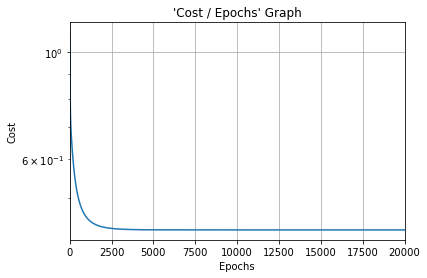

In [10]:
# Training 상황에 대한 그래프 출력
# Training 회수 별 Cost 값
plt.title("'Cost / Epochs' Graph")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(training_idx, cost_graph)
plt.xlim(0, epochs)
plt.grid(True)
plt.semilogy()
plt.show